    Tumor size  yes or no
0         3.52          0
1         2.78          0
2         3.02          0
3         0.18          0
4         1.82          0
5         2.65          0
6         4.94          1
7         4.56          1
8         4.80          1
9         4.22          1
10        3.96          1
11        5.99          1
            Tumor size  yes or no
Tumor size    1.000000   0.803806
yes or no     0.803806   1.000000
       Tumor size  yes or no
count   12.000000  12.000000
mean     3.536667   0.500000
std      1.570109   0.522233
min      0.180000   0.000000
25%      2.747500   0.000000
50%      3.740000   0.500000
75%      4.620000   1.000000
max      5.990000   1.000000
[[3.96]
 [4.94]
 [5.99]
 [1.82]
 [2.65]
 [3.02]
 [4.22]
 [4.56]
 [0.18]]
[[1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]]
[[1.54922396]]
[-5.65770732]
probability of the cancer:
 [[0.44906753]
 [0.20572904]
 [0.27308014]
 [0.00459195]
 [0.05529868]
 [0.17475954]
 [0.88031948]
 [0.80325345]
 [0.8555199

C:\Users\shaik\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


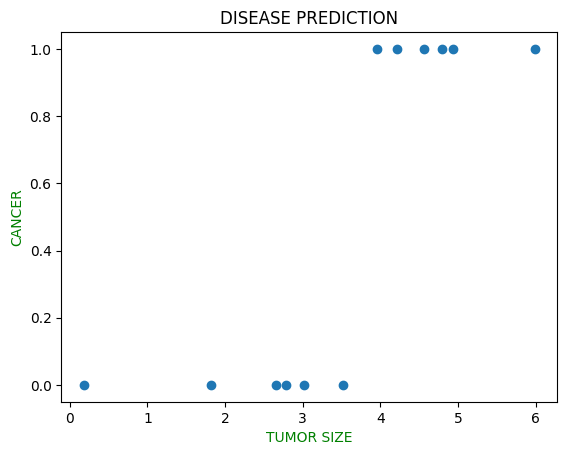

In [7]:
# IMPORT IMPORATANT LIBARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

# LOAD DATA SETS

ds=pd.read_csv("disease.csv")
data=pd.DataFrame(ds)
print(data)

#EXPLORE DATA ANLAYASIS

data.head()
data.shape
print(data.corr())
print(data.describe())

# PREPROCESSING

# 'x' represents the tumor_size in cm and 'y' represents is it cancer or not (0 for"no",1 for "yes")

x=data["Tumor size"].values.reshape(-1,1)
y=data["yes or no"].values.reshape(-1,1)

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train)
print(y_train)

# TRAINING THE MODEL

lin=LogisticRegression(max_iter=10000)
lin.fit(x,y)
print(lin.coef_)
print(lin.intercept_)

# PREDICTIONS

y_pred=lin.predict(x_test)

#FINDING THE PROBABLILTY OF THE DATA

def prob(lin,x):
    odd=lin.coef_*x+lin.intercept_
    odds=np.exp(odd)
    probability=odds/(1+odds)
    return(probability)

print("probability of the cancer:\n",prob(lin,x))

# EVALUATING THE MODEL

accuracy=accuracy_score(y_test,y_pred)
print("ACCURACY:",accuracy)
conf_mat=confusion_matrix(y_test,y_pred)
print("CONFUSION MATRIX :\n",conf_mat)
class_report=classification_report(y_test,y_pred)
print("CLASSIFICATION REPORT:",class_report)

# VISUVALIZATION OF THE MODEL

plt.scatter(x,y)
plt.xlabel("TUMOR SIZE",color="green")
plt.ylabel("CANCER",color="green")
plt.title("DISEASE PREDICTION",color="black")
plt.show()